# lab-random-variable-distributions

#Instructions

1. Use the numerical variables from our dataset this week.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
cat = pd.read_csv('categorical.csv')
cat

customer       state response  coverage education employmentstatus  \
0     BU79786  Washington       No     Basic  Bachelor         Employed   
1     QZ44356     Arizona       No  Extended  Bachelor       Unemployed   
2     AI49188      Nevada       No   Premium  Bachelor         Employed   
3     WW63253  California       No     Basic  Bachelor       Unemployed   
4     HB64268  Washington       No     Basic  Bachelor         Employed   
...       ...         ...      ...       ...       ...              ...   
9129  LA72316  California       No     Basic  Bachelor         Employed   
9130  PK87824  California      Yes  Extended   College         Employed   
9131  TD14365  California       No  Extended  Bachelor       Unemployed   
9132  UP19263  California       No  Extended   College         Employed   
9133  Y167826  California       No  Extended   College       Unemployed   

     gender location_code marital_status     policy_type  policy  \
0         F      Suburban        Married  Corporate Auto       3   
1         F      Suburban         Single   Personal Auto       3   
2         F      Suburban        Married   Personal Auto       3   
3         M      Suburban        Married  Corporate Auto       2   
4         M         Rural         Single   Personal Auto       1   
...     ...           ...            ...             ...     ...   
9129      M         Urban        Married   Personal Auto       1   
9130      F      Suburban       Divorced  Corporate Auto       3   
9131      M      Suburban         Single  Corporate Auto       2   
9132      M      Suburban        Married   Personal Auto       2   
9133      M      Suburban         Single  Corporate Auto       3   

      renew_offer_type sales_channel  vehicle_class vehicle_size  
0                    1         Agent   Two-Door Car      Medsize  
1                    3         Agent  Four-Door Car      Medsize  
2                    1         Agent   Two-Door Car      Medsize  
3                    1   Call Center            SUV      Medsize  
4                    1         Agent  Four-Door Car      Medsize  
...                ...           ...            ...          ...  
9129                 2           Web  Four-Door Car      Medsize  
9130                 1        Branch  Four-Door Car      Medsize  
9131                 1        Branch  Four-Door Car      Medsize  
9132                 3        Branch  Four-Door Car        Large  
9133                 4   Call Center   Two-Door Car      Medsize  

[9134 rows x 15 columns]

In [10]:
cat.head()

customer       state response  coverage education employmentstatus gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor         Employed      F   
3  WW63253  California       No     Basic  Bachelor       Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type  policy  renew_offer_type  \
0      Suburban        Married  Corporate Auto       3                 1   
1      Suburban         Single   Personal Auto       3                 3   
2      Suburban        Married   Personal Auto       3                 1   
3      Suburban        Married  Corporate Auto       2                 1   
4         Rural         Single   Personal Auto       1                 1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [25]:
# Looking at categorical values

<Axes: ylabel='count'>

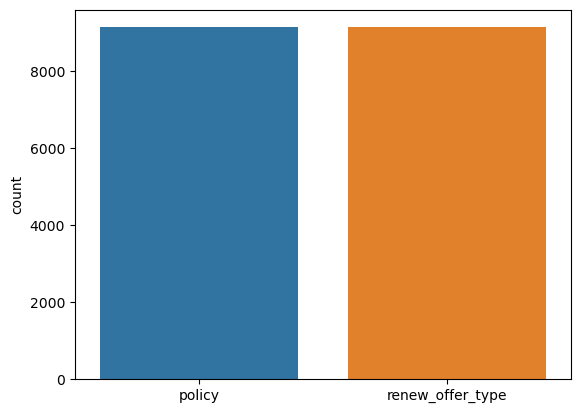

In [15]:
sns.countplot(data=cat)

In [16]:
def dis_cat(df):
    for column in df.columns:
        sns.displot(x=df[column])
        plt.show()
    return None

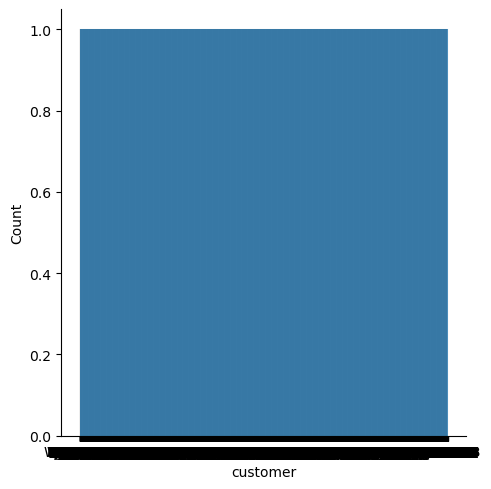

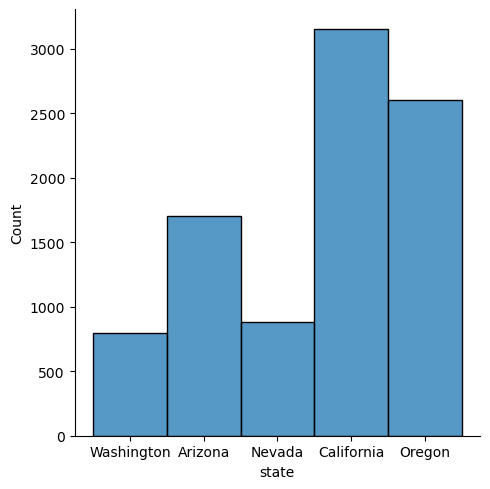

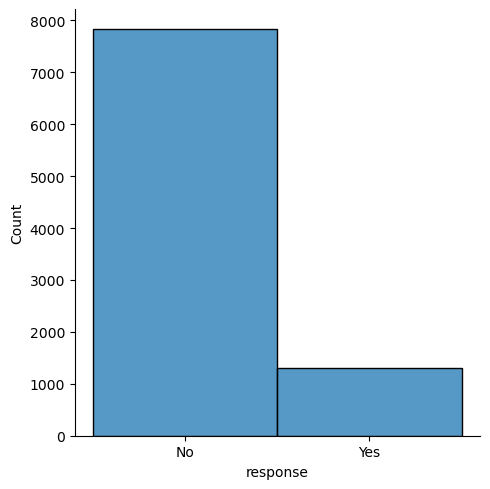

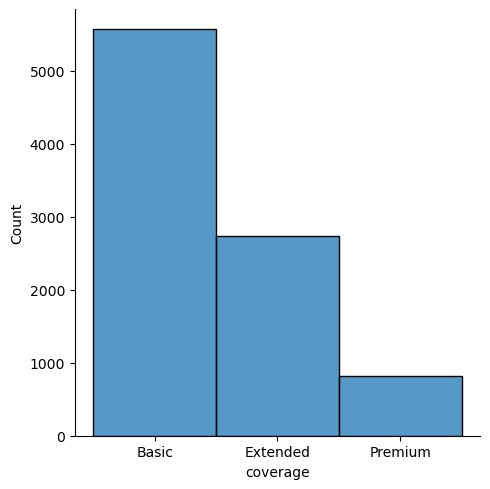

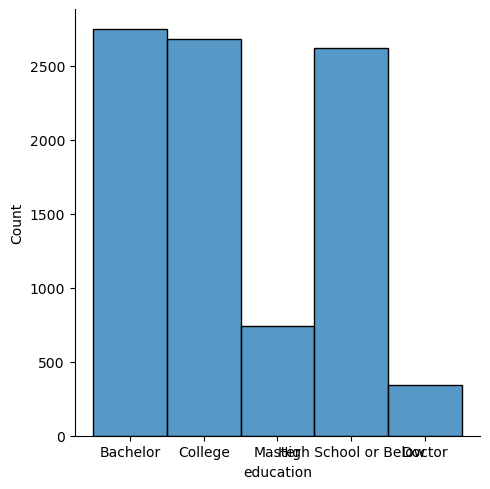

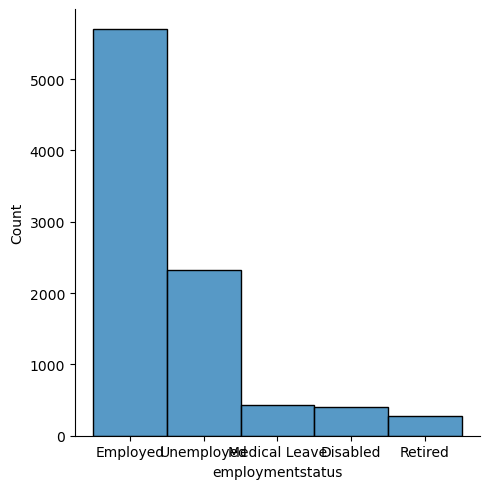

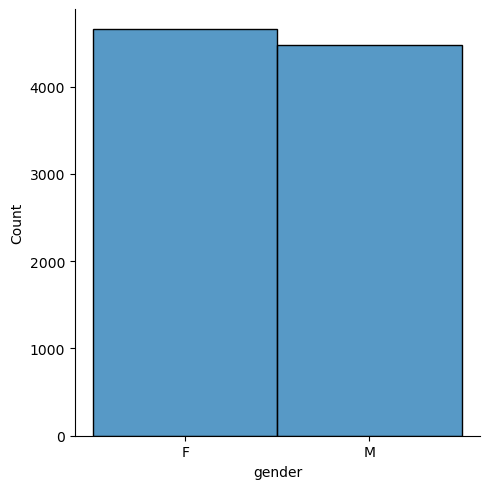

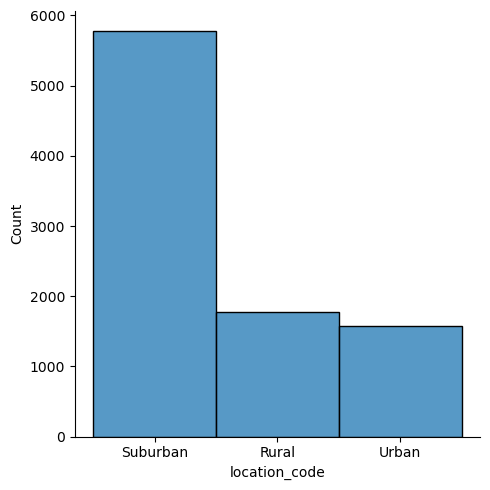

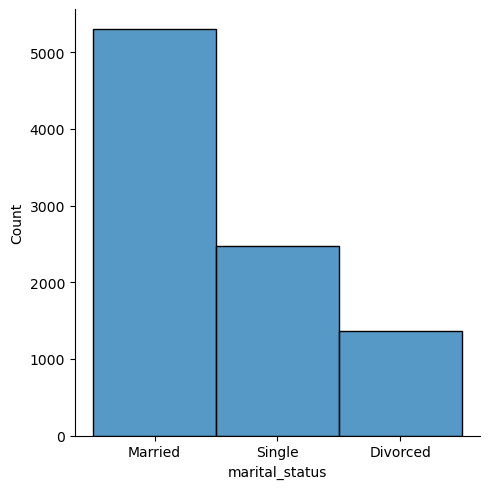

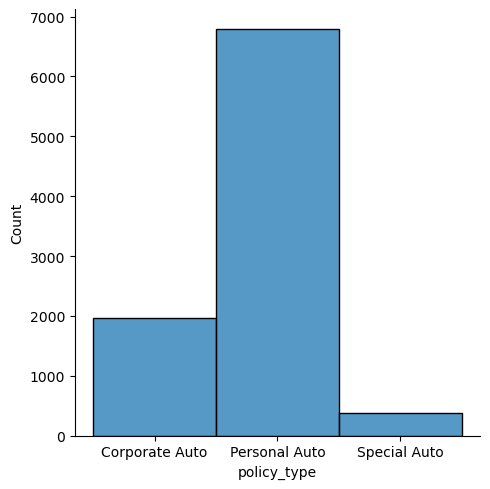

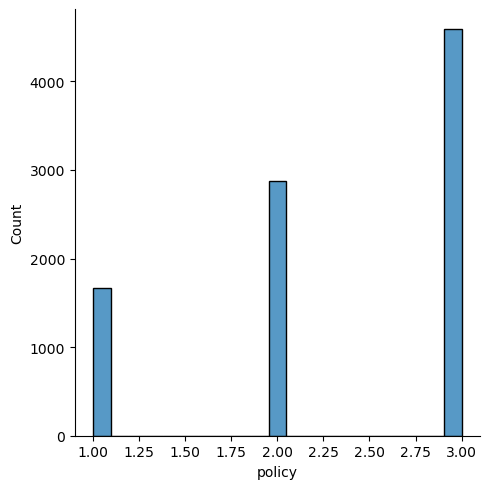

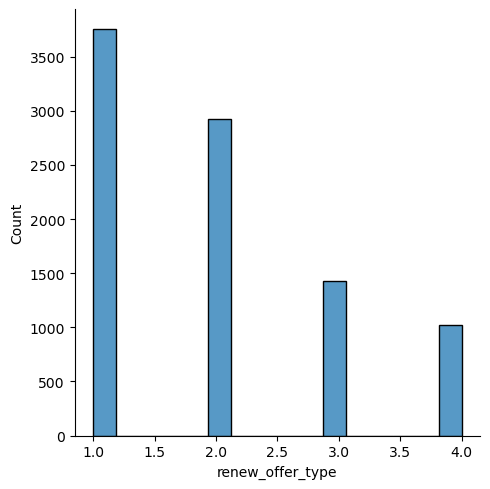

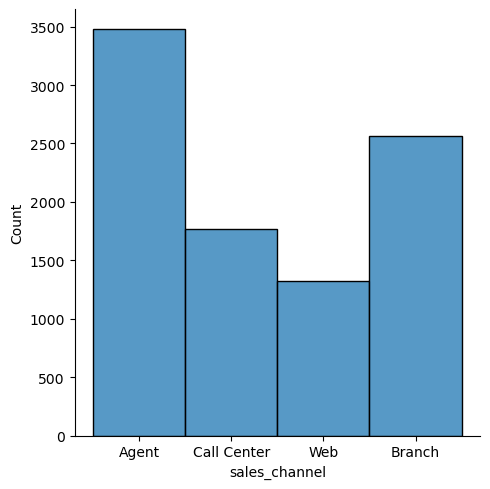

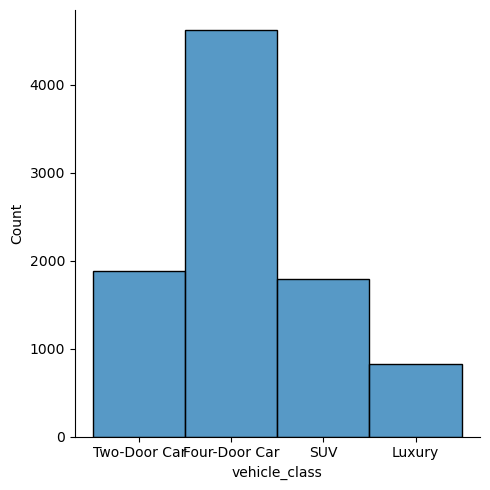

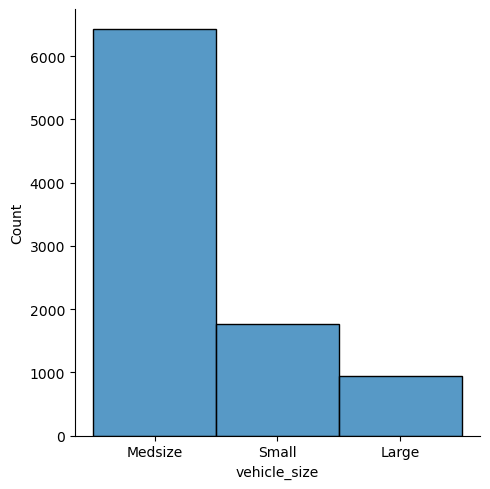

In [17]:
dis_cat(cat)

In [ ]:
# state normal distribution
# response exponential distribution
# coverage normal distribution
# education normal distribution
# employment status exponential distribution
# location_code xponential distribution
# maritial status normal distribution
# policy type normal distribution
# policy normal distribution
# renew_offer_type normal distribution
# sales channel normal distribution
# vehicel class normal distribution
# vehicle size exponential distribution


In [21]:
numerical = pd.read_csv('numerical.csv')
numerical

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

In [ ]:
# Looking at categorical columns

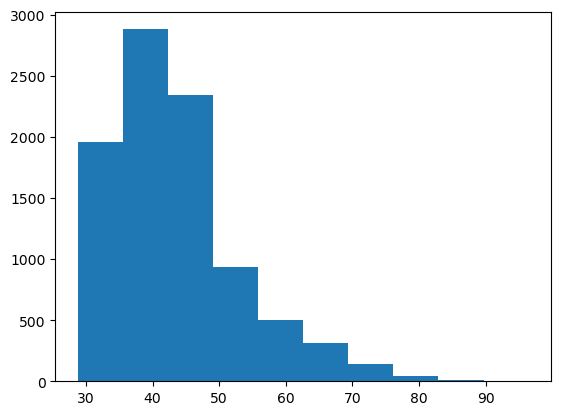

In [23]:
from scipy.stats import boxcox

numerical['customer_lifetime_value'] = boxcox(numerical['customer_lifetime_value'], 0.3)
plt.hist(numerical['customer_lifetime_value'])
plt.show()

In [ ]:
# exponential distribution, vlaues drop rapidly

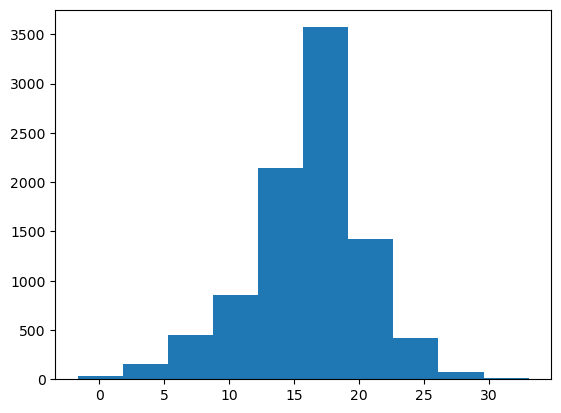

In [24]:
numerical['total_claim_amount'] = boxcox(numerical['total_claim_amount'], 0.3)
plt.hist(numerical['total_claim_amount'])
plt.show()

In [ ]:
# Normal distribution

# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

https://tariqueakhtar-39220.medium.com/log-transformation-and-visualizing-it-using-python-392cb4bcfc74#:~:text=In%20Python%2C%20the%20log%20transformation,to%20an%20array%20of%20data.

In [27]:
log_numerical = np.log(numerical)

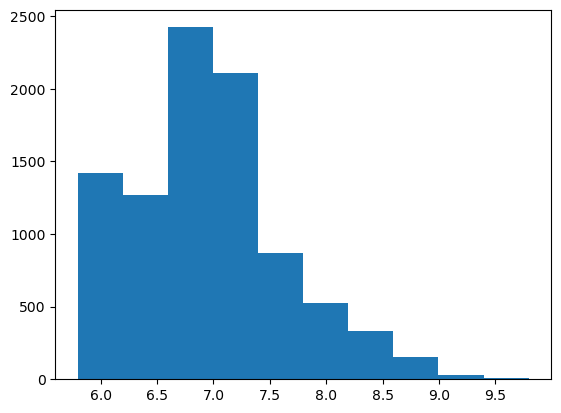

In [28]:
numerical['customer_lifetime_value'] = boxcox(numerical['customer_lifetime_value'], 0.3)
plt.hist(numerical['customer_lifetime_value'])
plt.show()

In [ ]:
# Result got less right skewed

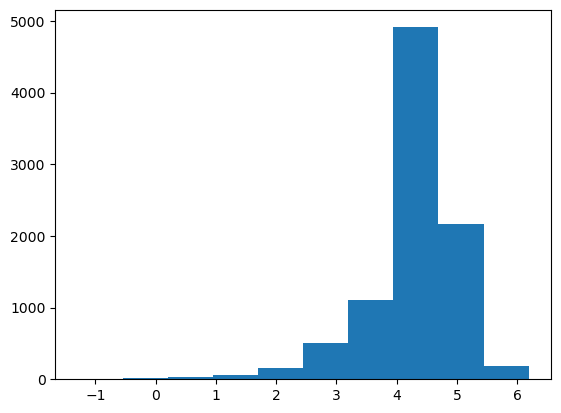

In [29]:
numerical['total_claim_amount'] = boxcox(numerical['total_claim_amount'], 0.3)
plt.hist(numerical['total_claim_amount'])
plt.show()

In [ ]:
# Result got more left skewed